# Problem Statement

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets,tree,preprocessing,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [69]:
#loading data

comp_data=pd.read_csv("Company_Data.csv")


In [70]:
#Size of data
comp_data.shape

(400, 11)

In [71]:
#display first 10 records
comp_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [72]:
comp_data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [73]:
comp_data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [74]:
sales=comp_data['Sales']

In [75]:
comp_data1=comp_data.drop('Sales',axis=1)

In [76]:
#Coverting continuous data to categorical data

In [77]:
cat_sale=pd.cut(sales,bins=[0,6,12,17],labels=['low','medium','high'])

In [78]:
comp_datac=pd.concat([comp_data1,cat_sale],axis=1) 

In [79]:
comp_datac.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,medium


In [80]:
#changing column name 
comp_datac=comp_datac.rename(columns={'Sales':'sale','CompPrice':'comprc',
                                      'Income':'income','Advertising':'advrt',
                                      'Population':'pop','Price':'Prc',
                                      'ShelveLoc':'shloc','Age':'age',
                                      'Education':'edu','Urban':'urbn',
                                      'US':'us'})

In [81]:
#checking for duplicate data
comp_datac.isna().sum()

comprc    0
income    0
advrt     0
pop       0
Prc       0
shloc     0
age       0
edu       0
urbn      0
us        0
sale      1
dtype: int64

In [82]:
#checking the data type of each column 
comp_datac.dtypes

comprc       int64
income       int64
advrt        int64
pop          int64
Prc          int64
shloc       object
age          int64
edu          int64
urbn        object
us          object
sale      category
dtype: object

# convertiong categorical data to numeric data

In [83]:
comp_datac['shloc'].value_counts()


Medium    219
Bad        96
Good       85
Name: shloc, dtype: int64

In [84]:
comp_datac['urbn'].value_counts()



Yes    282
No     118
Name: urbn, dtype: int64

In [85]:
comp_datac['us'].value_counts()



Yes    258
No     142
Name: us, dtype: int64

In [86]:
#changing categorical data to numeric 
label_encoder = preprocessing.LabelEncoder()
for i in comp_datac.columns:
    if i=='shloc':
        dum= pd.get_dummies(comp_datac[i])
        comp_datac=pd.concat([dum,comp_datac],axis=1)
        comp_datac=comp_datac.drop([i],axis=1)
    else:
        comp_datac[i]= label_encoder.fit_transform(comp_datac[i]) 


In [87]:
comp_datac.head(3)

,Bad,Good,Medium,comprc,income,advrt,pop,Prc,age,edu,urbn,us,sale
0,1,0,0,49,51,11,141,54,17,7,1,1,2
1,0,1,0,22,27,16,129,18,40,0,1,1,2
2,0,0,1,24,14,10,138,15,34,2,1,1,2


In [88]:
comp_datac.duplicated().sum()

0

In [89]:
#correlation between the data
comp_datac.corr()

,Bad,Good,Medium,comprc,income,advrt,pop,Prc,age,edu,urbn,us,sale
Bad,1.000000,-0.291913,-0.618133,-0.034371,0.071751,-0.034878,0.039450,-0.045666,-0.044123,0.012525,0.081122,0.000979,-0.153372
Good,-0.291913,1.000000,-0.571396,0.027269,-0.012596,0.056677,0.003015,0.047864,-0.022818,-0.029188,-0.039197,0.078864,-0.032623
Medium,-0.618133,-0.571396,1.000000,0.007081,-0.051214,-0.016654,-0.036328,-0.000154,0.056613,0.013242,-0.037391,-0.065656,0.158412
comprc,-0.034371,0.027269,0.007081,1.000000,-0.079859,-0.035710,-0.100362,0.572136,-0.103127,0.029123,0.066933,0.011883,-0.013768
income,0.071751,-0.012596,-0.051214,-0.079859,1.000000,0.059587,-0.005228,-0.048094,-0.004349,-0.057082,0.038040,0.089582,0.021841
advrt,-0.034878,0.056677,-0.016654,-0.035710,0.059587,1.000000,0.263980,0.036606,-0.004554,-0.033128,0.041649,0.685564,0.047648
pop,0.039450,0.003015,-0.036328,-0.100362,-0.005228,0.263980,1.000000,-0.013765,-0.043865,-0.105176,-0.052536,0.058735,0.003002
Prc,-0.045666,0.047864,-0.000154,0.572136,-0.048094,0.036606,-0.013765,1.000000,-0.109227,0.020664,0.053430,0.047886,-0.047946
age,-0.044123,-0.022818,0.056613,-0.103127,-0.004349,-0.004554,-0.043865,-0.109227,1.000000,0.006488,0.028479,0.008652,0.003645
edu,0.012525,-0.029188,0.013242,0.029123,-0.057082,-0.033128,-0.105176,0.020664,0.006488,1.000000,-0.033094,-0.078250,0.062568


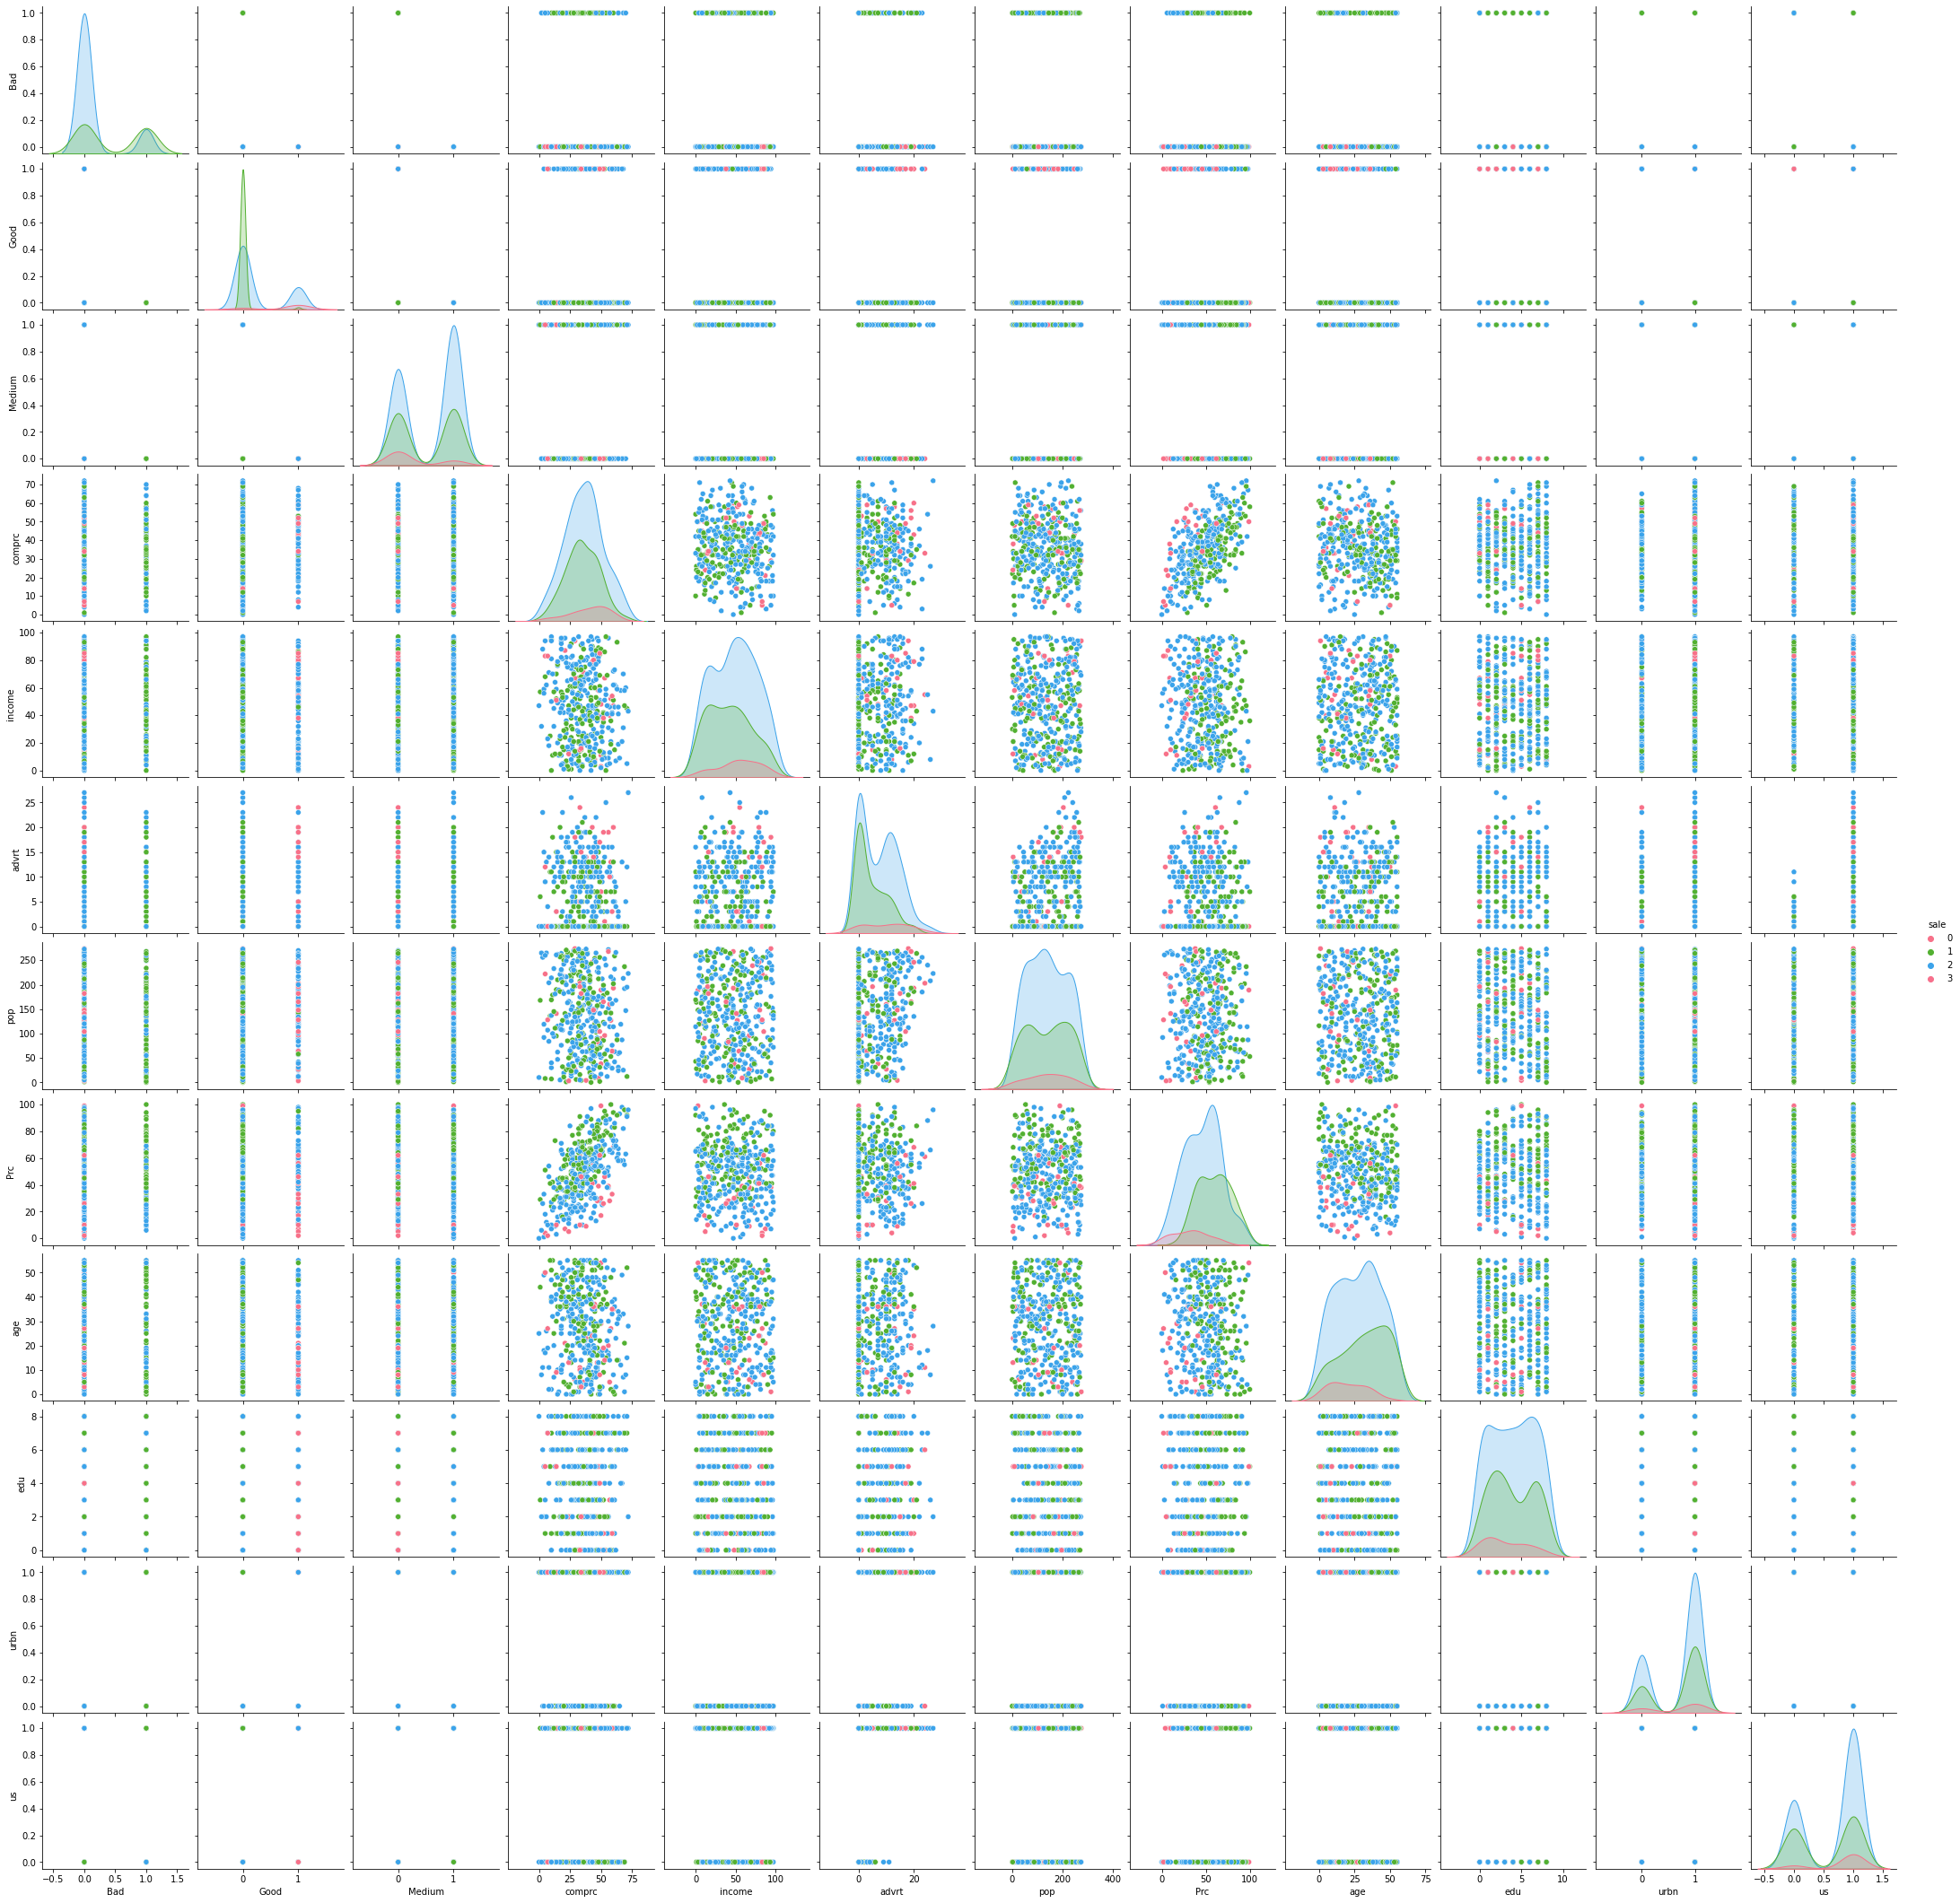

In [90]:
sns.pairplot(comp_datac,hue='sale',palette='husl')

def norm_data(x):
    i=(x-x.min())/(x.max()-x.min())
    return (i)

comp_norm=norm_data(comp_datac.iloc[:,0:])
comp_norm

comp_norm.dtypes

In [106]:
#Assigning data to variable x
X=comp_datac.iloc[:,0:-1]

In [107]:
X

,Bad,Good,Medium,comprc,income,advrt,pop,Prc,age,edu,urbn,us
0,1,0,0,49,51,11,141,54,17,7,1,1
1,0,1,0,22,27,16,129,18,40,0,1,1
2,0,0,1,24,14,10,138,15,34,2,1,1
3,0,0,1,28,77,4,249,31,30,4,1,1
4,1,0,0,52,42,3,178,62,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,1,0,49,85,17,104,62,8,4,1,1
396,0,0,1,50,2,3,17,54,30,1,0,1
397,0,0,1,71,5,12,195,91,15,8,1,1
398,1,0,0,12,57,7,145,29,25,2,1,1


In [108]:
Y=comp_datac.iloc[:,-1]

In [109]:
Y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: sale, Length: 400, dtype: int64

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [111]:
x_train.head(3)

,Bad,Good,Medium,comprc,income,advrt,pop,Prc,age,edu,urbn,us
34,0,0,1,26,32,0,215,62,17,7,1,1
350,0,0,1,22,78,17,135,25,38,7,0,1
16,0,1,0,29,11,0,145,44,38,3,1,0


In [112]:
y_train.head(5)

34     1
350    2
16     2
121    2
323    2
Name: sale, dtype: int64

# Building Decision tree using 'Gini'

In [115]:
#creating a model
model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=5)

In [116]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

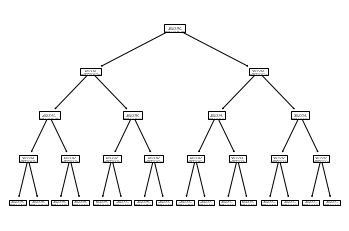

In [117]:

tree.plot_tree(model);

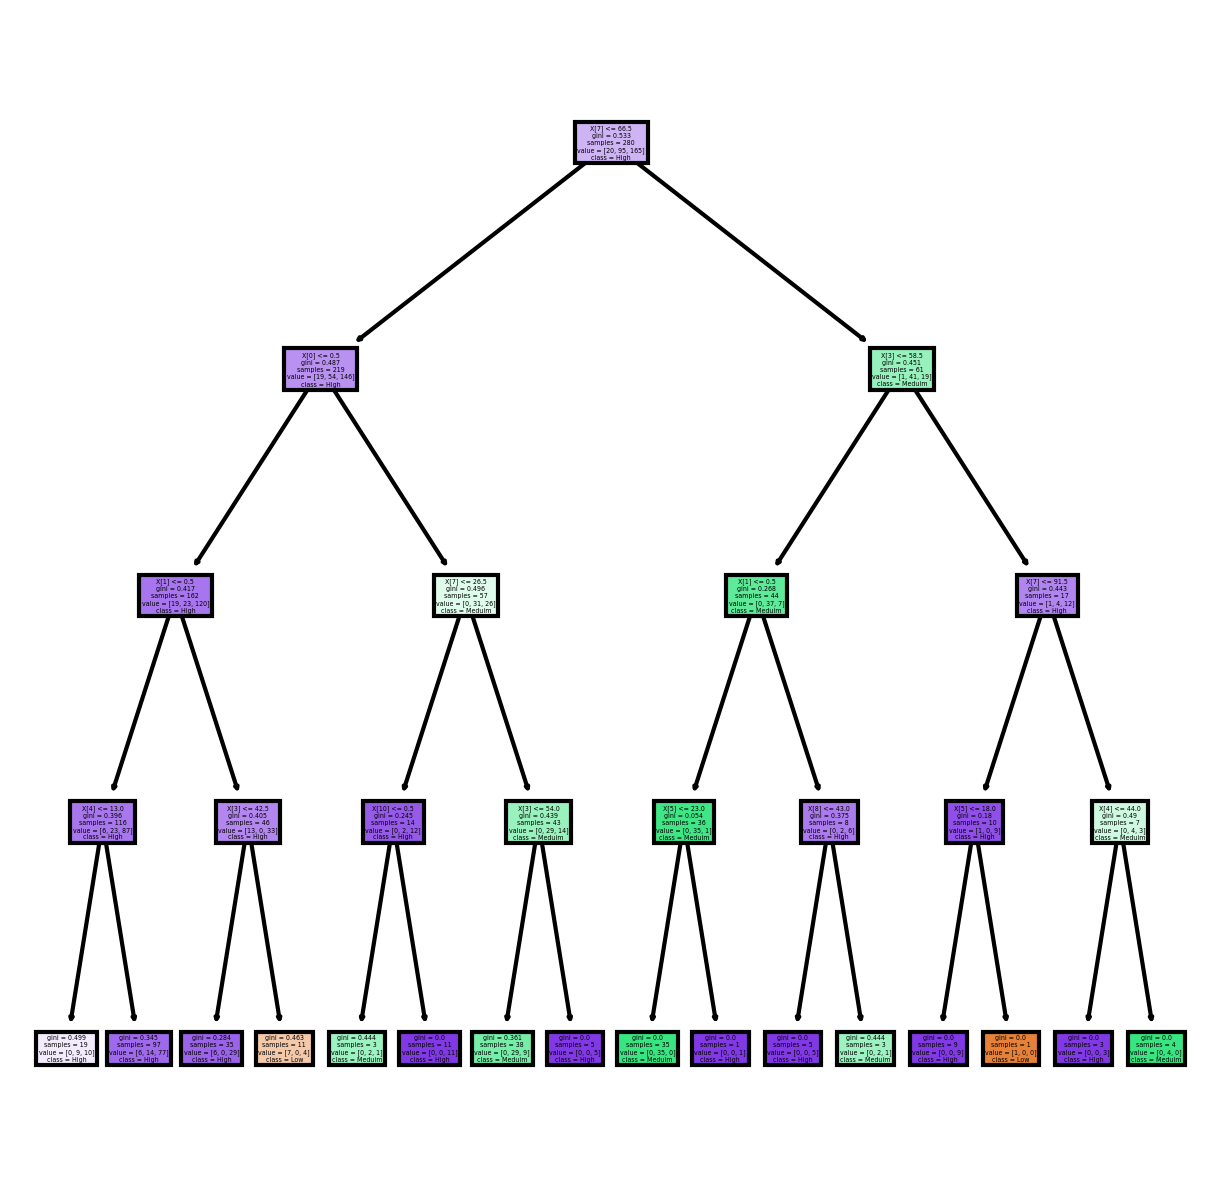

In [120]:

cn=['Low','Meduim','High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model,class_names=cn,filled=True)
plt.show()

In [121]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

2    78
1    33
0     9
dtype: int64

In [122]:
metrics.accuracy_score(preds,y_test)

0.675

# Building Decision tree using 'entropy'

In [133]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=10)

In [134]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

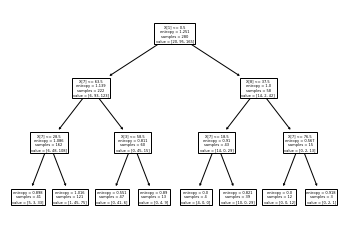

In [135]:
tree.plot_tree(model1);

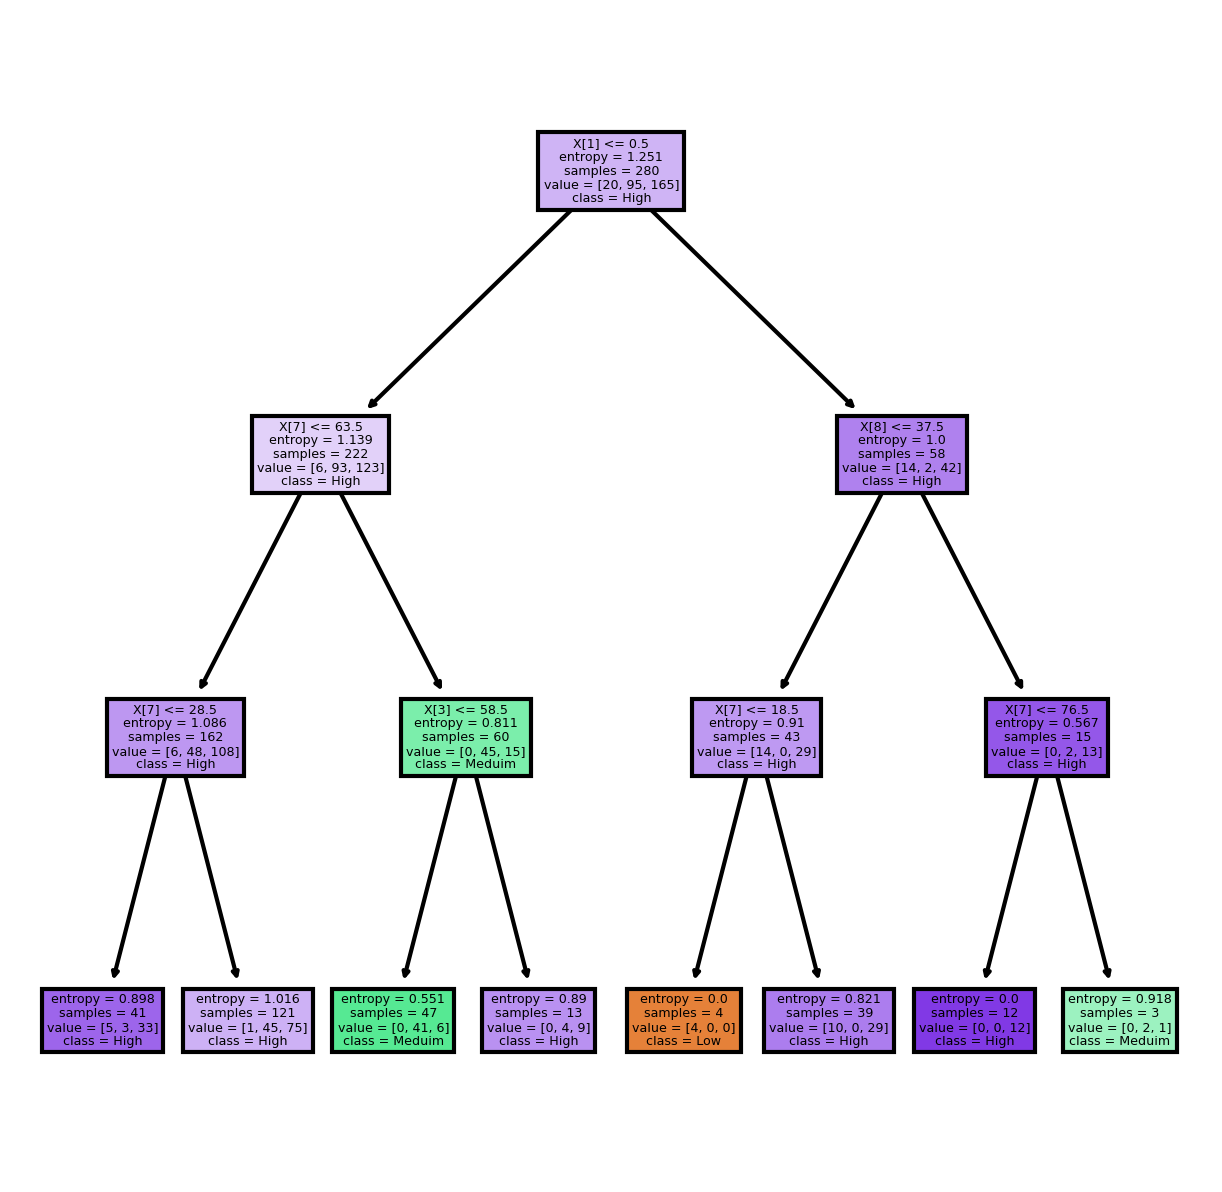

In [136]:
cn=['Low','Meduim','High']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(model1,class_names=cn,filled=True)
plt.show()

In [137]:
preds1=model1.predict(x_test)
pd.Series(preds1).value_counts()

2    96
1    23
0     1
dtype: int64

In [138]:
metrics.accuracy_score(preds,y_test)

0.675

In [ ]:
#We got the accuracy of 0.675